In [1]:
import pandas as pd

In [5]:
df = pd.read_csv(r"E:\VARIOS\python-ml-course-master\datasets\wine\winequality-red.csv", sep = ";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

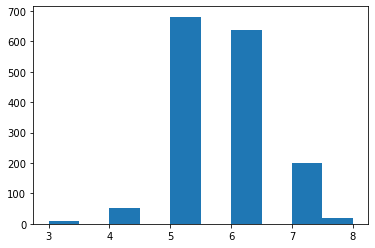

In [8]:
plt.hist(df["quality"])

In [9]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


# Normalizacion de los datos

In [10]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


# Clustering jerarquci con scikit-learn

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [27]:
md_h = pd.Series(clus.labels_)
md_h

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Text(0, 0.5, 'Número de vinos del cluster')

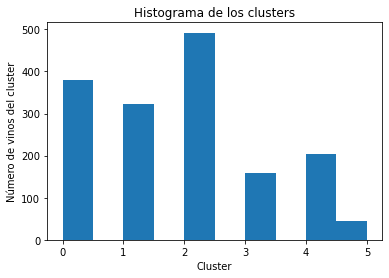

In [28]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [16]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
Z = linkage (df_norm, "ward")

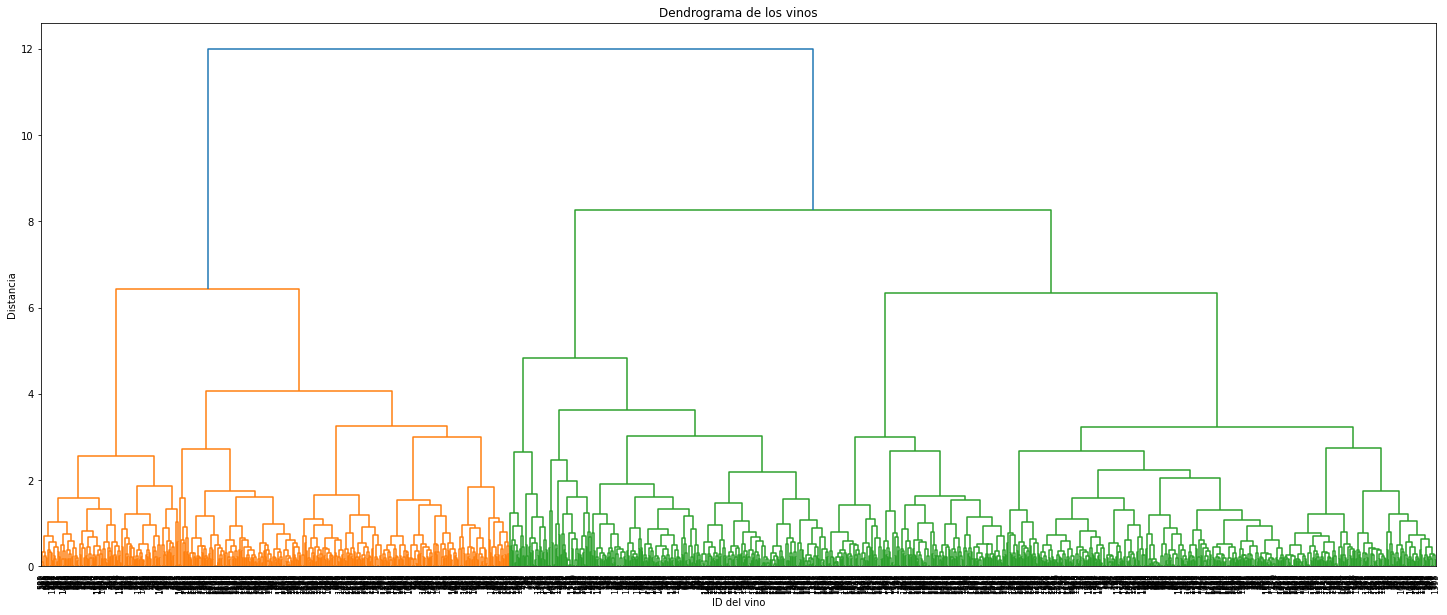

In [23]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel ("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

# K-means

In [24]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [25]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [26]:
model.labels_

array([3, 3, 3, ..., 1, 1, 2])

In [29]:
md_k = pd.Series(model.labels_)

In [30]:
df_norm["clust_h"] = md_h
df_norm["clust_k"]= md_k

In [31]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,3
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,3
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3


(array([ 28.,   0., 230.,   0., 258.,   0., 509.,   0., 257., 317.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

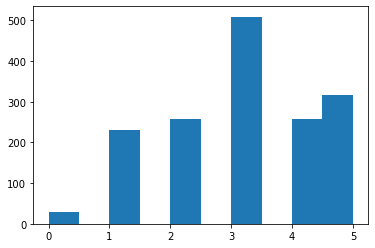

In [32]:
plt.hist(md_k)

In [33]:
model.cluster_centers_

array([[0.33249052, 0.28522505, 0.49785714, 0.07265166, 0.55008347,
        0.21780684, 0.21794548, 0.51305853, 0.23003375, 0.60179641,
        0.15549451, 0.46428571],
       [0.17610619, 0.32432996, 0.08913043, 0.09416319, 0.09608042,
        0.24856093, 0.12292211, 0.32587627, 0.57733653, 0.18516011,
        0.48637681, 0.61043478],
       [0.36290046, 0.15975098, 0.42329457, 0.10547414, 0.10543412,
        0.16350038, 0.08386063, 0.40849071, 0.41863517, 0.23557536,
        0.49129398, 0.69689922],
       [0.26393936, 0.35883548, 0.12363458, 0.09137578, 0.12364419,
        0.14473284, 0.1075274 , 0.49211549, 0.48625528, 0.1557945 ,
        0.22036673, 0.44007859],
       [0.57666747, 0.20368051, 0.50645914, 0.131816  , 0.1305873 ,
        0.13722804, 0.09139157, 0.6528223 , 0.3351512 , 0.22556444,
        0.29055173, 0.54941634],
       [0.31657408, 0.27714878, 0.30457413, 0.15202455, 0.12698872,
        0.38048163, 0.29785645, 0.5390477 , 0.43592737, 0.17890402,
        0.21400954,

In [34]:
model.inertia_

186.570104148426

# Interpretacion final

In [35]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.332491,0.285225,0.497857,0.072652,0.550083,0.217807,0.217945,0.513059,0.230034,0.601796,0.155495,0.464286,5.000000
1,0.176106,0.324330,0.089130,0.094163,0.096080,0.248561,0.122922,0.325876,0.577337,0.185160,0.486377,0.610435,3.417391
2,0.362900,0.159751,0.423295,0.105474,0.105434,0.163500,0.083861,0.408491,0.418635,0.235575,0.491294,0.696899,0.108527
3,0.263939,0.358835,0.123635,0.091376,0.123644,0.144733,0.107527,0.492115,0.486255,0.155795,0.220367,0.440079,2.005894
4,0.576667,0.203681,0.506459,0.131816,0.130587,0.137228,0.091392,0.652822,0.335151,0.225564,0.290552,0.549416,1.984436
5,0.316574,0.277149,0.304574,0.152025,0.126989,0.380482,0.297856,0.539048,0.435927,0.178904,0.214010,0.456151,1.044164
